In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

import sklearn

# Reading the Dataset

In [2]:
boston=pd.read_csv('Boston.csv')

In [3]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Check and Treat Missing Values

In [5]:
boston.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

### Check the data types of the variables

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


So the feature chas is infact categorical. So we will try and convert it into categorical

In [7]:
# boston['chas']=boston['chas'].astype(object)

In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    object 
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 59.4+ KB


Come back to treating the missing values.

In [9]:
boston[['crim','zn','indus','age','lstat']] = boston[['crim','zn','indus','age','lstat']].fillna((boston[['crim','zn','indus','age','lstat']].mean()))

In [10]:
boston['chas']=boston['chas'].fillna(method='bfill')

### Splitting into X and Y 


In [23]:
X=boston.iloc[:,0:-1]
Y=boston.iloc[:,-1]
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


We didn't use the usual iloc[ ].values because we wanted it to be a dataframe 

In [12]:
X.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

Splitting into train and test datasets

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=10)

Apply the model on training data

In [24]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3)

DT_reg=regressor.fit(X_train, Y_train)

In [25]:
DT_reg

DecisionTreeRegressor(max_depth=3)

In [26]:
print(DT_reg.score(X_train,Y_train))
print(DT_reg.score(X_test,Y_test))

0.8122534828644048
0.7432781105511292


In [27]:
Y_pred=DT_reg.predict(X_test)

In [28]:
Y_pred

array([22.79937888, 22.79937888, 22.79937888, 22.79937888, 22.79937888,
       17.10136986, 46.86      , 17.10136986, 22.79937888, 46.86      ,
       22.79937888, 22.79937888, 22.79937888, 22.79937888, 22.79937888,
       46.86      , 22.79937888, 22.79937888, 22.79937888, 17.10136986,
       22.79937888, 17.10136986, 22.79937888, 22.79937888, 33.79166667,
       22.79937888, 17.10136986, 12.1625    , 46.86      , 12.1625    ,
       33.79166667, 33.79166667, 22.79937888, 22.79937888, 17.10136986,
       22.79937888, 12.1625    , 33.79166667, 22.79937888, 22.79937888,
       46.86      , 22.79937888, 12.1625    , 22.79937888, 17.10136986,
       22.79937888, 22.79937888, 22.79937888, 46.86      , 17.10136986,
       22.79937888, 17.10136986, 22.79937888, 46.86      , 22.79937888,
       33.79166667, 22.79937888, 22.79937888, 22.79937888, 21.4       ,
       22.79937888, 22.79937888, 46.86      , 46.86      , 22.79937888,
       17.10136986, 22.79937888, 12.1625    , 22.79937888, 28.55

In [29]:
from sklearn.tree import plot_tree

checking for the sklearn version


We did this so that we can plot the tree next 

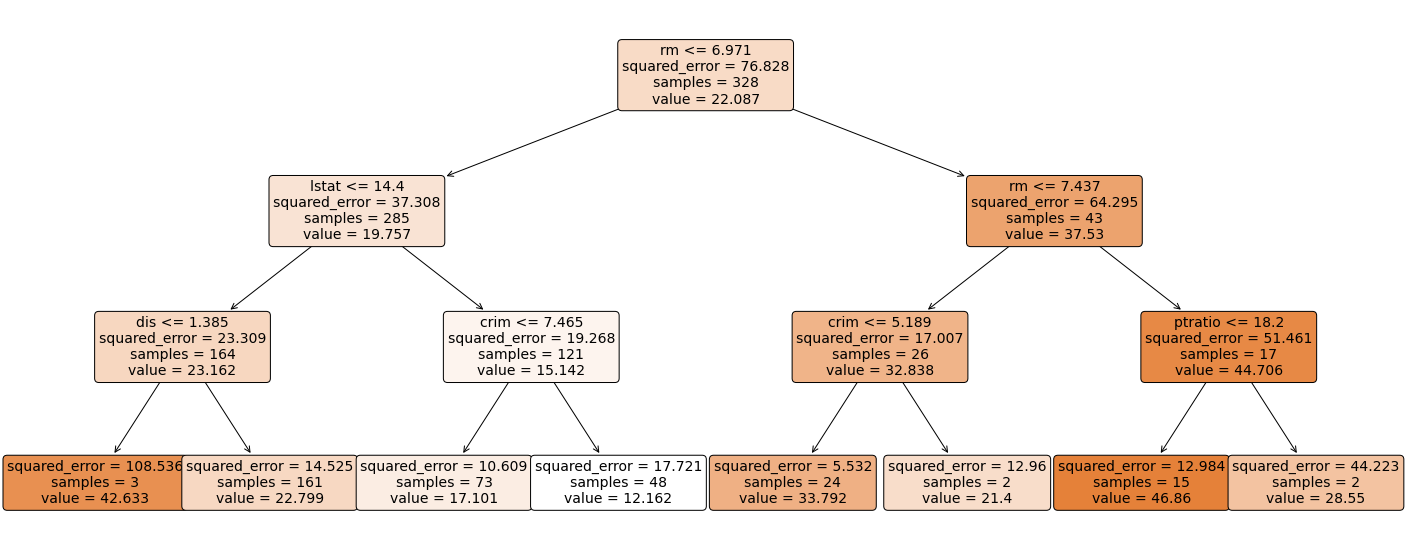

In [30]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

measure of features according to importance

Text(0, 0.5, 'Feature')

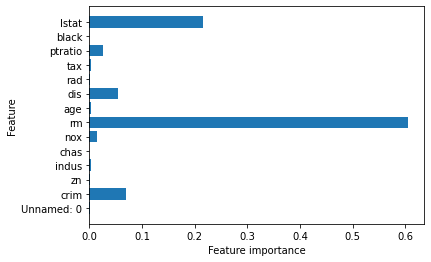

In [22]:
features = X_train.shape[1]
plt.barh(range(features), regressor.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')